In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2') 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


In [3]:
target = np.loadtxt('../proxy/cluster/GXsub_DM_InL_rcin200_100000_TMP.txt')[loc]

In [4]:
maind = np.loadtxt('../proxy/GadgetX_DS_main_v2')
maind = maind[loc,1:]

In [5]:
# plt.figure(figsize = (11,3))

def plot_D3(ax):
    maind = np.loadtxt('../proxy/GadgetX_DS_main_v2')
    maind = maind[loc,1:]

    RF1 = np.loadtxt('../image_hypara/data_nRandom/D3_one_OOB')[:,0]
    RF1err = np.loadtxt('../image_hypara/data_nRandom/D3_one_OOB')[:,1]
    print(RF1)
    cc = np.zeros(26)
    for i in range(26):
        cc[i] = np.corrcoef(maind[:,i],target)[0][1]

    labels = [r'$\eta$',r'$\Delta_{\rm r}$',r'$f_{\rm s}$',r'$\chi_{\rm DS}$',r'$c/a$',r'$\dot{M}_\mathrm{a}$',
             r'$f_{\rm ste}$',r'$M$1',r'$M$2', '$r$1', '$r$2', r'$f_{\rm red}$',
             r'$M_*$',r'$M_{\rm gas}$', r'$\Delta_{\rm o}$', r'$\sigma_{\rm V}$',r'$\lambda_{\rm t}$',
             r'$\lambda_{\rm gas}$',r'$\lambda_{\rm star}$',r'$Z_{\rm gas}$',r'$Z_{\rm star}$',r'$\rm age$',
             r'$\rm SFR$', r'$T_{500}$', r'$n_e$',r'$K_{500}$']

    wd = 1
    dx = 4
    xx2 = np.arange(0.5,0.5+dx*26,dx)
    ax.bar(xx2, RF1, color = 'b', width = 1.2, alpha = 0.7,label = r'$R^2$')
    ax.errorbar(xx2, RF1, yerr = RF1err*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
    # xx3 = np.arange(0.5,0.5+dx*27,dx) + wd
    # plt.bar(xx3, np.mean(ooblack1, axis = 1), color = 'k', width = wd, alpha = 0.7,label = r'$lack R^2$')
    print(cc)
    print(RF1)

    ax.set_xticks(np.arange(0.5,0.5+dx*26,dx))
    ax.set_xticklabels(labels)
    ax.set_ylabel(r'$R^2$', fontsize = 12)
    # plt.ylabel(r'$N_{\rm int}$', fontsize = 12)

    ax.grid(c = 'grey',axis = 'x', ls  = '--', alpha = 0.5)

    ax.axhline(0,color = 'k',ls = '-', lw = 0.8)
    ax.tick_params(top = 'on', right = 'on', which='both',direction = 'in',labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 12)
    bwith = 1.2 #边框宽度设置为2
#     ax = plt.gca()#获取边框
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    ax.set_xlim(-1.5,0.5+dx*26-1)

#     ax.legend()

# plt.savefig('./figs/one.pdf')

In [12]:
#subplots for X-ray, SZ and optical map
def plot_Xray(ax):
    
    Xray_RF1 = np.loadtxt('../image_hypara/data_nRandom/Xray_one_OOB')[:,0]
    Xrayerr_RF1 = np.loadtxt('../image_hypara/data_nRandom/Xray_one_OOB')[:,1]

    Xrayd = np.loadtxt('../proxy/GadgetX_DS_Xray')[loc,1:]
    print(Xrayd.shape)
    Xray_cc = np.zeros(7)
    for i in range(7):
        Xray_cc[i] = np.corrcoef(Xrayd[:,i],target)[0][1]

    labels = [r'$A$', r'$c$', r'$P$', r'$w$', r'$S$', r'$G$', r'$\mathcal{M}$']

    wd = 1
    dx = 4
#     xx1 = np.arange(0.5,0.5+dx*7,dx) - wd/2
#     ax.bar(xx1, np.abs(Xray_cc), color = 'r', width = wd, alpha = 0.7,label = r'$|\gamma|$')
    xx2 = np.arange(0.5,0.5+dx*7,dx)
    ax.bar(xx2, Xray_RF1, color = 'b', width = 0.94, alpha = 0.7,label = r'$R^2$')
    ax.errorbar(xx2, Xray_RF1, yerr = Xrayerr_RF1*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
    # xx3 = np.arange(0.5,0.5+dx*27,dx) + wd
    # plt.bar(xx3, np.mean(ooblack1, axis = 1), color = 'k', width = wd, alpha = 0.7,label = r'$lack R^2$')
    print(Xray_cc)
    print(Xray_RF1)
    
    ax.set_xticks(np.arange(0.5,0.5+dx*7,dx))
    ax.set_xticklabels(labels)
    ax.set_ylabel(r'$R^2$', fontsize = 12)

    ax.grid(c = 'grey',axis = 'x', ls  = '--', alpha = 0.5)

    ax.axhline(0,color = 'k',ls = '-', lw = 0.8)
    ax.tick_params(top = 'on', right = 'on', which='both',direction = 'in',labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 12)
    bwith = 1.2 #边框宽度设置为2
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    ax.set_xlim(-1.5,0.5+dx*7-1)
    ax.set_ylim(-0.03,0.2)
    ax.text(0.35,0.15,'X-ray', weight = 'demibold')

#     ax.legend()

In [13]:
#subplots for X-ray, SZ and optical map

def plot_SZ(ax):
    SZ_RF1 = np.loadtxt('../image_hypara/data_nRandom/SZ_one_OOB')[:,0]
    SZerr_RF1 = np.loadtxt('../image_hypara/data_nRandom/SZ_one_OOB')[:,1]

    SZd = np.loadtxt('../proxy/GadgetX_DS_SZ')[loc,1:]
    SZ_cc = np.zeros(7)
    for i in range(7):
        SZ_cc[i] = np.corrcoef(SZd[:,i],target)[0][1]

    labels = [r'$A$', r'$c$', r'$P$', r'$w$', r'$S$', r'$G$', r'$\mathcal{M}$']

    wd = 1
    dx = 4
#     xx1 = np.arange(0.5,0.5+dx*7,dx) - wd/2
#     ax.bar(xx1, np.abs(SZ_cc), color = 'r', width = wd, alpha = 0.7,label = r'$|\gamma|$')
    xx2 = np.arange(0.5,0.5+dx*7,dx) 
    ax.bar(xx2, SZ_RF1, color = 'b', width = 0.94, alpha = 0.7,label = r'$R^2$')
    ax.errorbar(xx2, SZ_RF1, yerr = SZerr_RF1*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
    # xx3 = np.arange(0.5,0.5+dx*27,dx) + wd
    # plt.bar(xx3, np.mean(ooblack1, axis = 1), color = 'k', width = wd, alpha = 0.7,label = r'$lack R^2$')
    print(SZ_cc)
    print(SZ_RF1)

    ax.set_xticks(np.arange(0.5,0.5+dx*7,dx))
    ax.set_xticklabels(labels)
    ax.set_ylabel(r'$R^2$', fontsize = 12)
    # plt.ylabel(r'$N_{\rm int}$', fontsize = 12)


    ax.grid(c = 'grey',axis = 'x', ls  = '--', alpha = 0.5)

    ax.axhline(0,color = 'k',ls = '-', lw = 0.8)
    ax.tick_params(top = 'on', right = 'on', which='both',direction = 'in',labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 12)
    bwith = 1.2 #边框宽度设置为2
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    ax.set_xlim(-1.5,0.5+dx*7-1)
    ax.set_ylim(-0.03,0.2)
    ax.text(0.35,0.15,'SZ', weight = 'demibold')

#     ax.legend(fontsize = 'small',loc = 'upper center')

In [22]:
#subplots for X-ray, SZ and optical map
def plot_Offset(ax):
    Offset_RF1 = np.loadtxt('../image_hypara/data_nRandom/Offset_one_OOB')[:,0]
    Offseterr_RF1 = np.loadtxt('../image_hypara/data_nRandom/Offset_one_OOB')[:,1]

    Offsetd = np.loadtxt('../proxy/GadgetX_DS_Offset')[loc,1:]
    Offset_cc = np.zeros(15)
    for i in range(15):
        Offset_cc[i] = np.corrcoef(Offsetd[:,i],target)[0][1]

    labels = [r'$R_{\rm BCG}$', r'$R_{\rm SZ}$', r'$R_{\rm X}$', r'$R_{\rm Py}$', r'$R_{\rm PX}$',
              r'$O_{\rm BCG-SZ}$', r'$O_{\rm BCG-X}$', r'$O_{\rm BCG-Py}$' ,r'$O_{\rm BCG-PX}$',
             r'$O_{\rm SZ-X}$',r'$O_{\rm SZ-Py}$',r'$O_{\rm SZ-PX}$',
             r'$O_{\rm X-Py}$',r'$O_{\rm X-PX}$',r'$O_{\rm Py-PX}$']

    wd = 1
    dx = 4
#     xx1 = np.arange(0.5,0.5+dx*15,dx) - wd/2
#     ax.bar(xx1, np.abs(Offset_cc), color = 'r', width = wd, alpha = 0.7,label = r'$|\gamma|$')
    xx2 = np.arange(0.5,0.5+dx*15,dx)
    ax.bar(xx2, Offset_RF1, color = 'b', width = 0.94, alpha = 0.7,label = r'$R^2$')
    ax.errorbar(xx2, Offset_RF1, yerr = Offseterr_RF1*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
    # xx3 = np.arange(0.5,0.5+dx*27,dx) + wd
    # plt.bar(xx3, np.mean(ooblack1, axis = 1), color = 'k', width = wd, alpha = 0.7,label = r'$lack R^2$')
    print(Offset_cc)
    print(Offset_RF1)

    ax.set_xticks(np.arange(0.5,0.5+dx*15,dx))
    ax.set_xticklabels(labels)
    ax.set_ylabel(r'$R^2$', fontsize = 12)


    ax.grid(c = 'grey',axis = 'x', ls  = '--', alpha = 0.5)

    ax.axhline(0,color = 'k',ls = '-', lw = 0.8)
    ax.tick_params(top = 'on', right = 'on', which='both',direction = 'in',labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 8)
    bwith = 1.2 #边框宽度设置为2
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    ax.set_xlim(-1.5,0.5+dx*15-1)
    ax.set_ylim(-0.03,0.25)
    ax.text(52,0.17,'Offset', weight = 'demibold')

#     ax.legend(fontsize = 'small',loc = 'upper center')

## All presentation

<IPython.core.display.Javascript object>


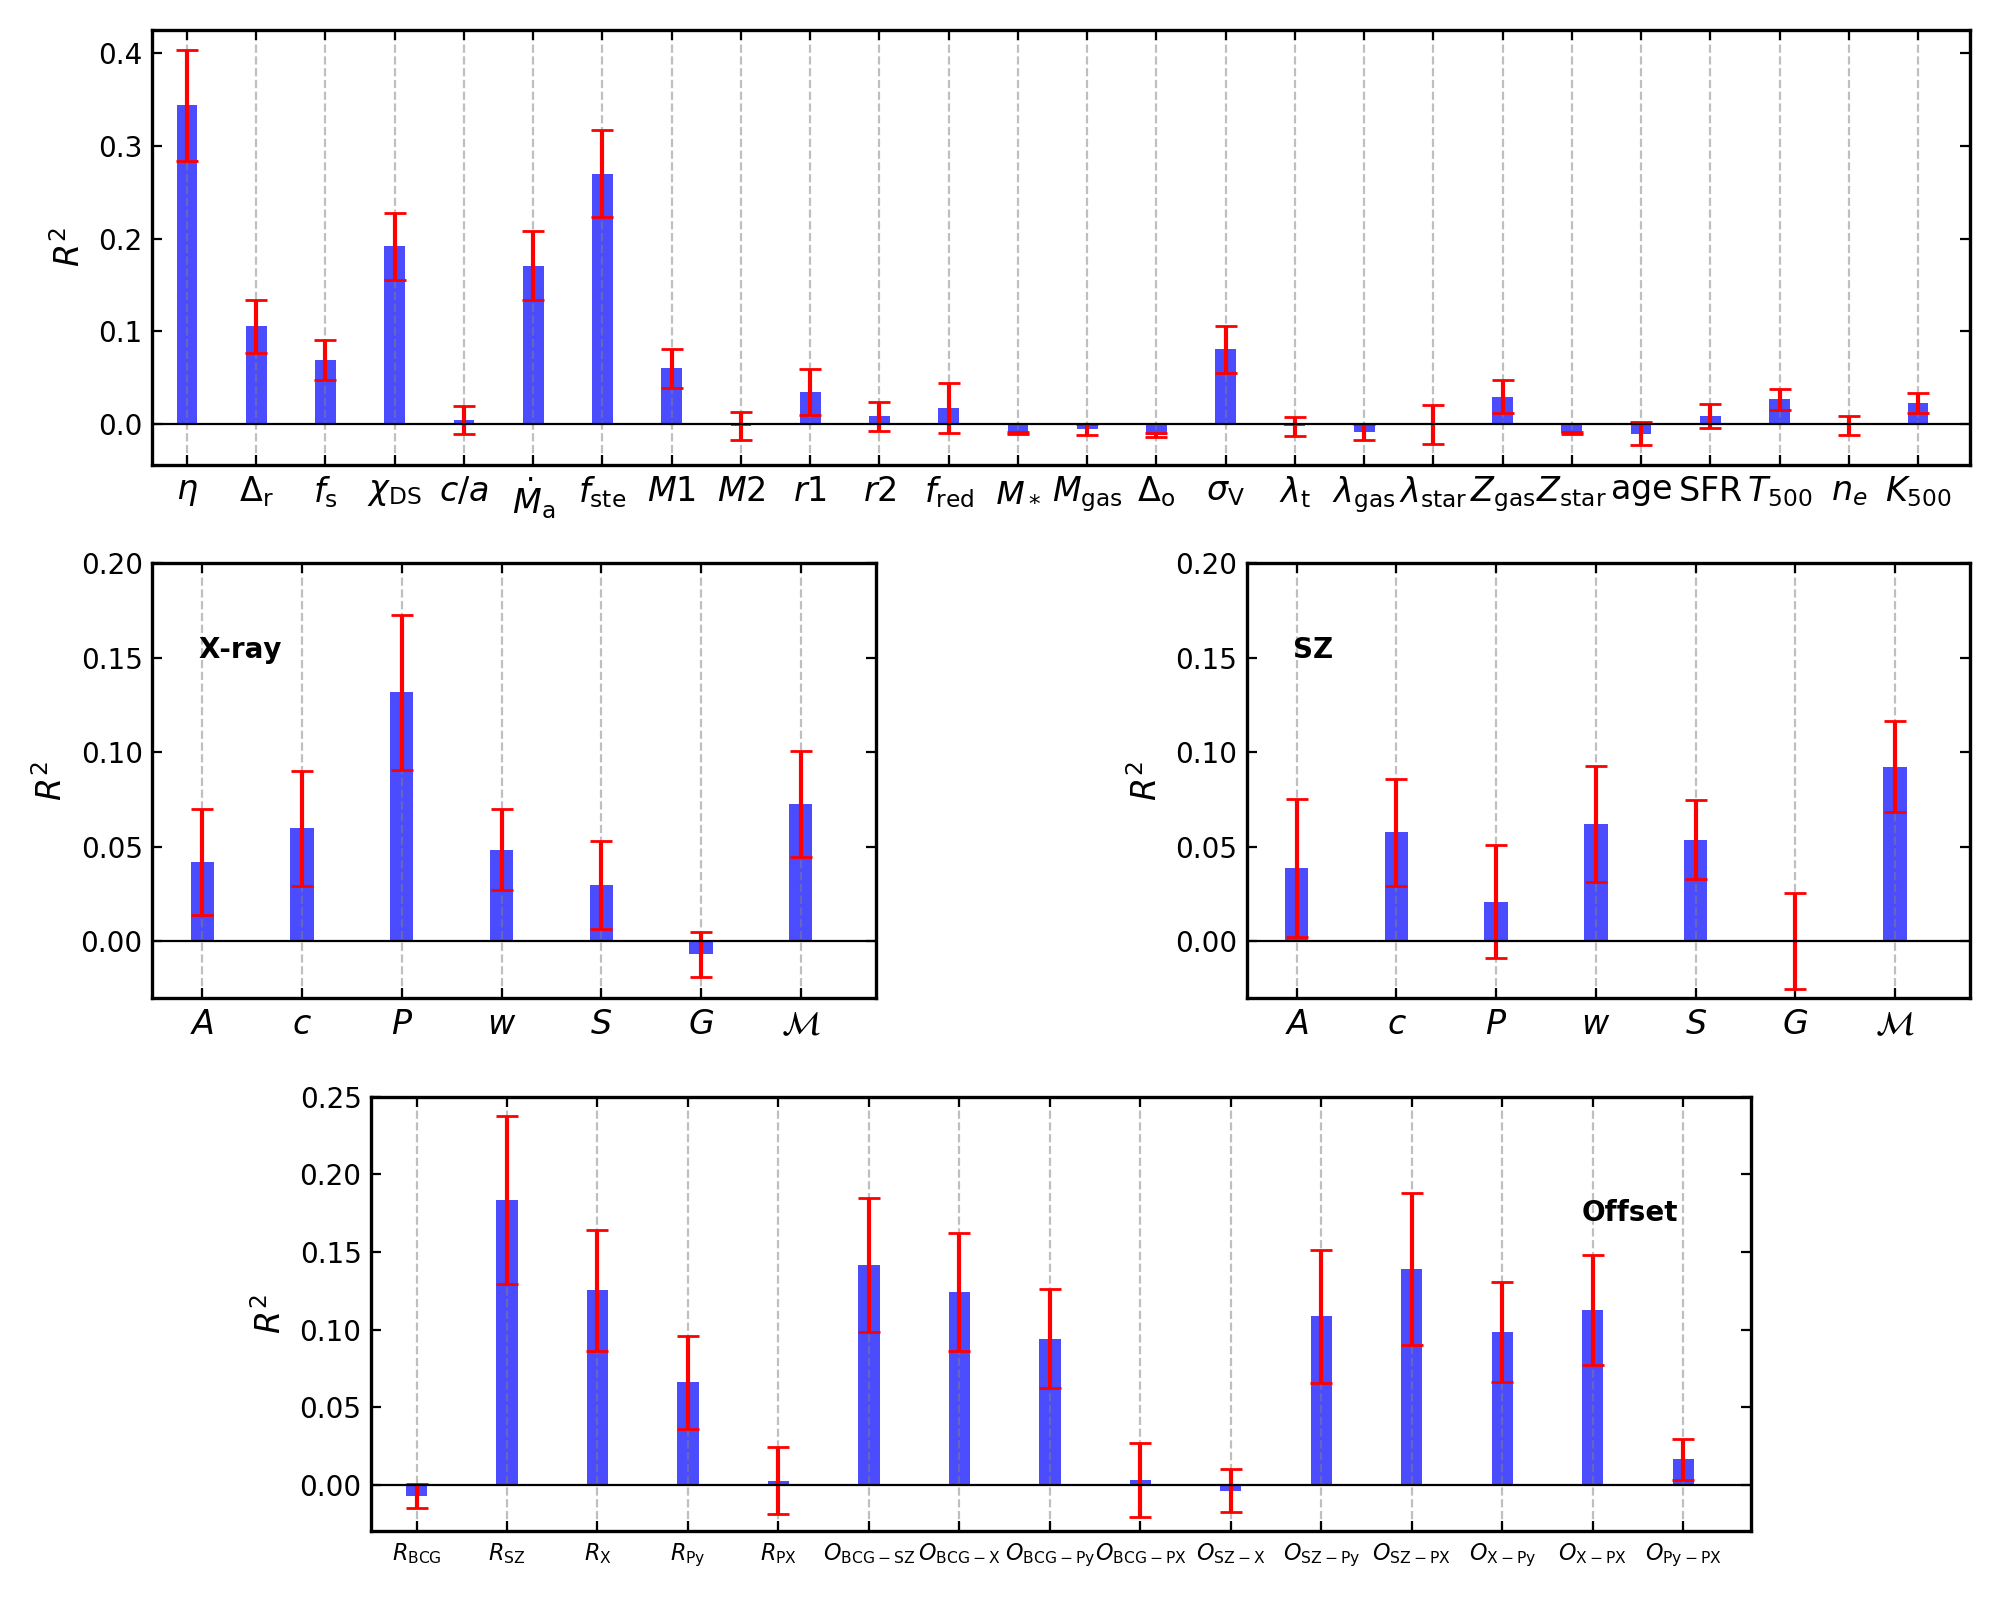

[ 3.43585943e-01  1.05482147e-01  6.90923827e-02  1.91640847e-01
  4.49831914e-03  1.70826416e-01  2.70084597e-01  5.98793670e-02
 -2.49205520e-03  3.47909458e-02  8.18429743e-03  1.76938145e-02
 -9.24820298e-03 -5.80105102e-03 -1.16278100e-02  8.03891237e-02
 -2.42352127e-03 -8.61141719e-03 -2.34612085e-04  2.95540698e-02
 -9.32947584e-03 -1.02681344e-02  8.57612473e-03  2.67282475e-02
 -1.52625129e-03  2.24023294e-02]
[ 0.59284893  0.36637381  0.1670687  -0.36425334 -0.14127326  0.47832956
 -0.48015676  0.16394957  0.1867964  -0.22169747 -0.16604394 -0.22655027
  0.15437896  0.18751018  0.16007741  0.42044947  0.10390535  0.03918568
  0.13704054 -0.17562277 -0.00526333 -0.02626561  0.03486654  0.3123271
  0.10784479  0.33823261]
[ 3.43585943e-01  1.05482147e-01  6.90923827e-02  1.91640847e-01
  4.49831914e-03  1.70826416e-01  2.70084597e-01  5.98793670e-02
 -2.49205520e-03  3.47909458e-02  8.18429743e-03  1.76938145e-02
 -9.24820298e-03 -5.80105102e-03 -1.16278100e-02  8.03891237e-02

In [23]:
# font_setting = {'font.family': 'serif',
# 'mathtext.fontset': 'stix'}

# for key in font_setting:
#     plt.rcParams[key] = font_setting[key]

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = "Times New Roman"
# plt.rcParams["text.usetex"] = True
# from matplotlib import rc
# rc('text', usetex=True)

plt.figure(figsize = (10,8))
axD3 = plt.subplot2grid((6,9),(0,0),colspan = 11,rowspan = 2)
axXray = plt.subplot2grid((6,9),(2,0),colspan = 4,rowspan = 2)
axSZ = plt.subplot2grid((6,9),(2,5),colspan = 4,rowspan = 2)
axOffset = plt.subplot2grid((6,9),(4,1),colspan = 7,rowspan = 2)

plot_D3(axD3)
plot_Xray(axXray)
plot_SZ(axSZ)
plot_Offset(axOffset)

plt.tight_layout()

plt.savefig('./figs/one_oob_sqrt2.pdf')

In [5]:
RF1 = np.loadtxt('../image_hypara/D3_one_OOB')
print(RF1[:,0])
print(RF1[:,1])

[ 3.43585943e-01  1.05482147e-01  6.72954161e-02  1.91640847e-01
  4.49831914e-03  1.70826416e-01  2.70084597e-01  5.51810581e-02
 -6.12411444e-03  3.86039466e-02  8.18429743e-03  1.75256977e-02
 -9.24820298e-03 -9.23700174e-03 -3.19955566e-02  8.03891237e-02
 -2.42352127e-03 -8.61141719e-03 -2.34612085e-04  2.95540698e-02
 -9.32947584e-03 -2.29473278e-02  8.57612473e-03  2.67282475e-02
 -1.52625129e-03  2.24023294e-02]
[0.0424169  0.02024493 0.01670027 0.02546078 0.01081354 0.02651713
 0.03331954 0.01459637 0.00767537 0.01307806 0.01085233 0.01039815
 0.00075938 0.00075011 0.01332617 0.0179307  0.00714147 0.00630078
 0.01473389 0.0125925  0.00076623 0.01036884 0.00889195 0.00817905
 0.00709295 0.0075091 ]


<IPython.core.display.Javascript object>


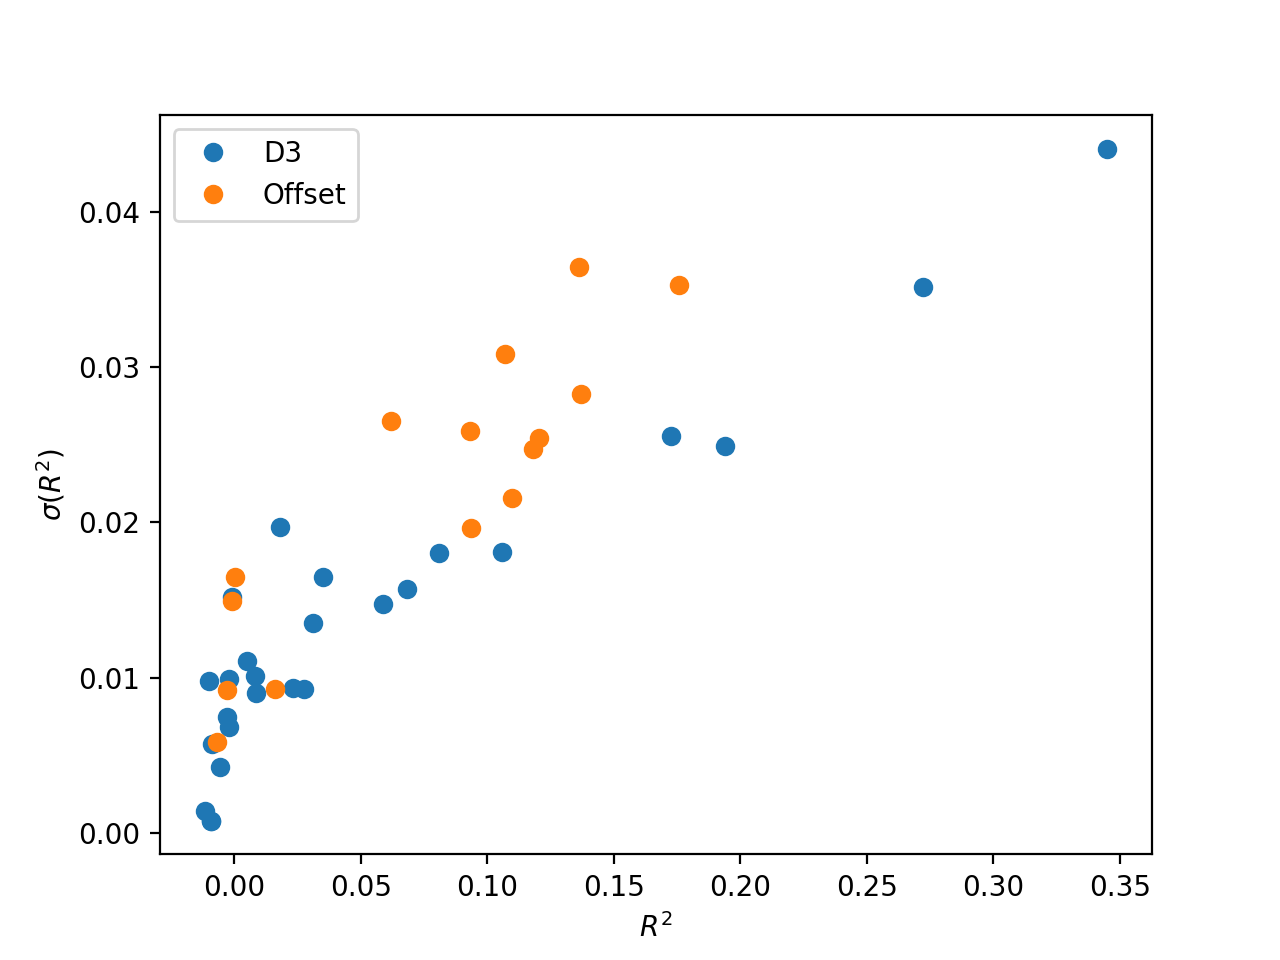

<IPython.core.display.Javascript object>


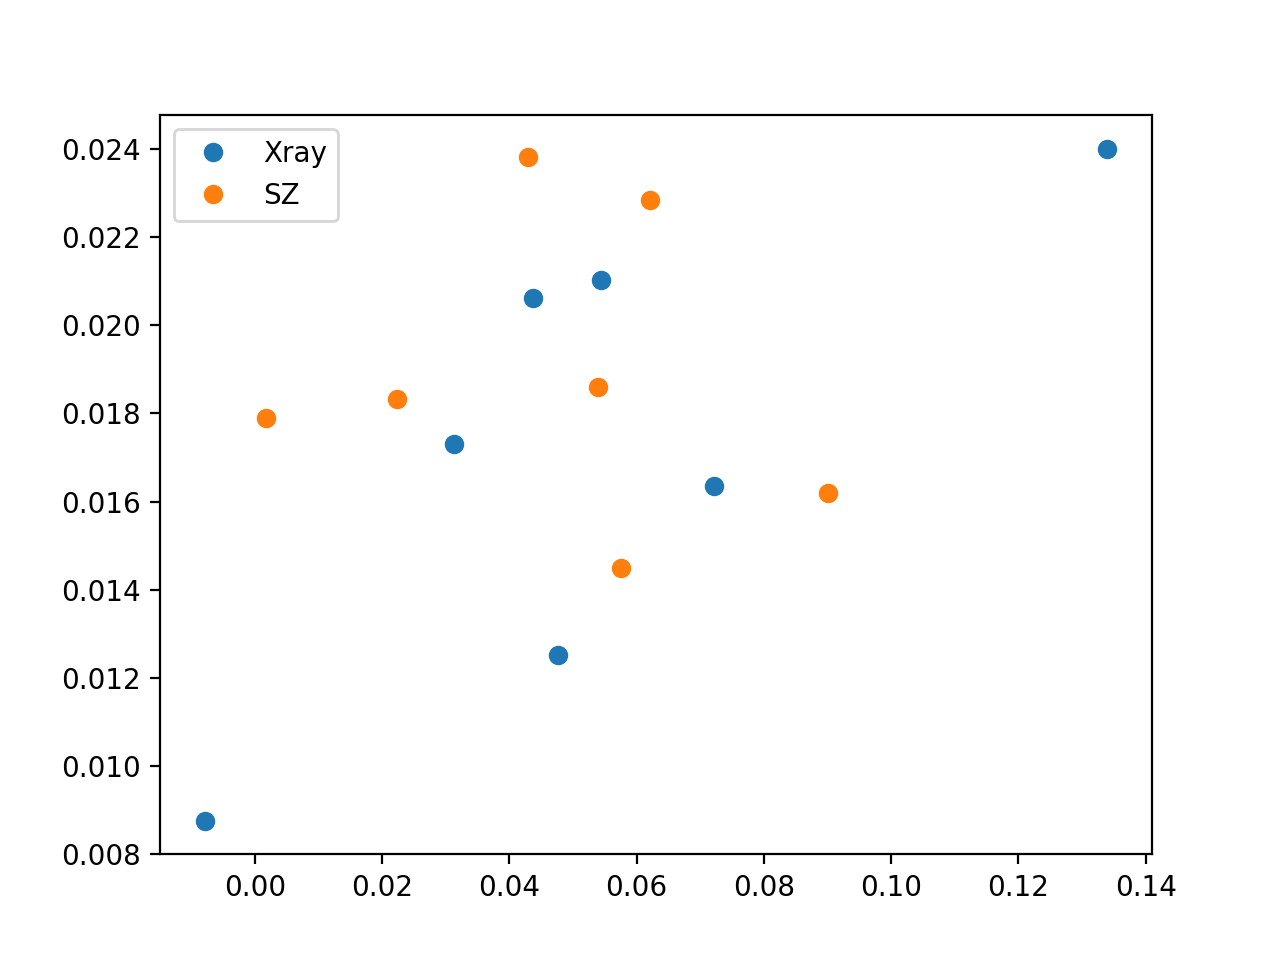

In [11]:
RF1 = np.loadtxt('../image_hypara/data_boot200/D3_one_OOB')[:,0]
RF1err = np.loadtxt('../image_hypara/data_boot200/D3_one_OOB')[:,1]

SZ_RF1 = np.loadtxt('../image_hypara/data_boot200/SZ_one_OOB')[:,0]
SZerr_RF1 = np.loadtxt('../image_hypara/data_boot200/SZ_one_OOB')[:,1]

Xray_RF1 = np.loadtxt('../image_hypara/data_boot200/Xray_one_OOB')[:,0]
Xrayerr_RF1 = np.loadtxt('../image_hypara/data_boot200/Xray_one_OOB')[:,1]

Offset_RF1 = np.loadtxt('../image_hypara/data_boot200/Offset_one_OOB')[:,0]
Offseterr_RF1 = np.loadtxt('../image_hypara/data_boot200/Offset_one_OOB')[:,1]
    
plt.figure()
plt.plot(RF1, RF1err, 'o', label = 'D3')
plt.plot(Offset_RF1, Offseterr_RF1, 'o', label = 'Offset')

plt.xlabel(r'$R^2$')
plt.ylabel(r'$\sigma(R^2)$')

plt.legend()

plt.figure()
plt.plot(Xray_RF1, Xrayerr_RF1, 'o', label = 'Xray')
plt.plot(SZ_RF1, SZerr_RF1, 'o', label = 'SZ')
plt.legend()